In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

In [2]:
# Loading the dataset
bnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
# Showing the first raws
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Showing the last raws
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
# Showing information about the dataset
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Printing the number of raws and columns
print(f'Number of rows: {bnb_df.shape[0]}')
print(f'Number of columns: {bnb_df.shape[1]}')

Number of rows: 48895
Number of columns: 16


## 1.1 Cleaning Data

In [7]:
# List of columns to drop
drop_list = ['id', 'host_id', 'host_name', 'last_review', 'name', 'neighbourhood']

In [8]:
# Dropping the list 
bnb_df.drop(drop_list, axis=1, inplace=True)

In [9]:
# Calculate the percentage of missing values for each column
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [10]:
# Replace the missing values in 'reviews_per_month' with the mean
bnb_df['reviews_per_month'].fillna(bnb_df['reviews_per_month'].mean(), inplace=True)

In [11]:
# Calculate the percentage again to see if there are still missing values
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## 1.2 Statistics of the Data

In [12]:
# Generate summary statistics of the data 
bnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.373221,1.497775,0.01000,0.28000,1.22000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [13]:
# Counting the values in 'neighbourhood_group'
bnb_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

# 2. Exploratory Data Analysis

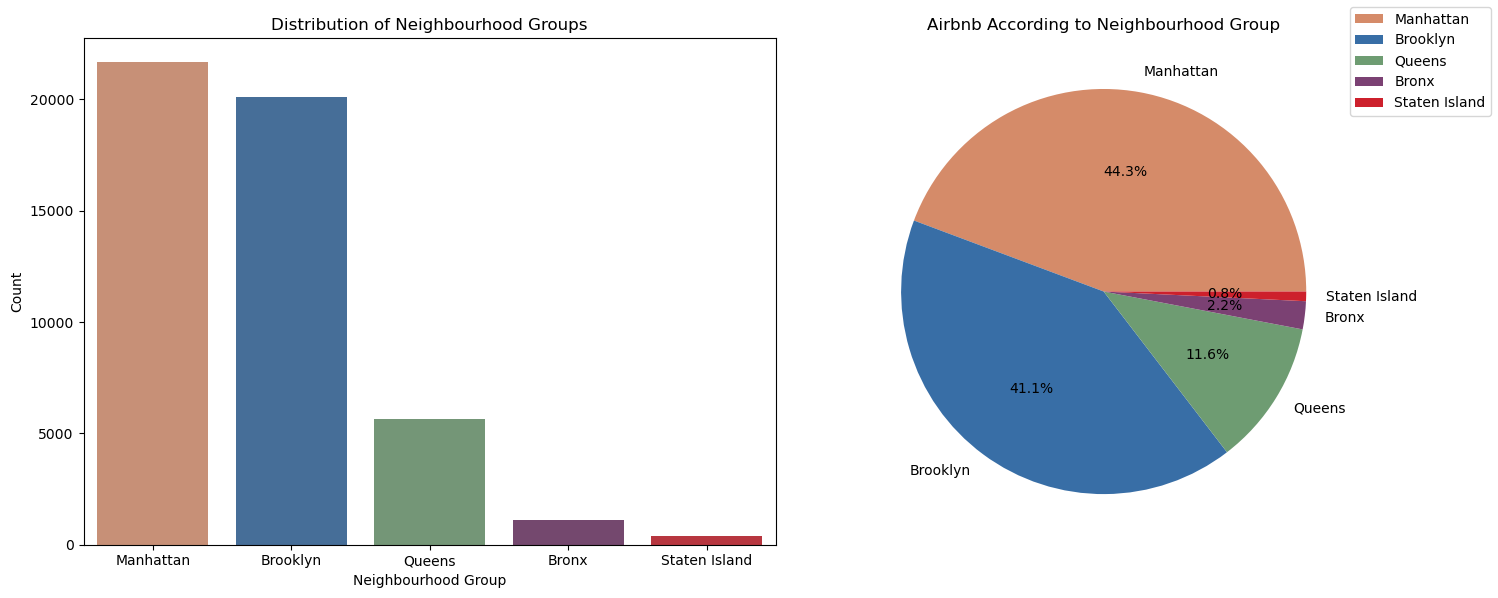

In [14]:
# Create plots for the distribution of neighbourhood groups
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Define labels, colors, explode settings, and sizes for neighbourhood groups
labels = bnb_df.neighbourhood_group.value_counts().index
colors = ['#D58B69','#386EA6','#6E9C72','#7B4173','#CD202C']
explode = [0,0,0,0,0]
sizes = bnb_df.neighbourhood_group.value_counts().values

# Count plot for neighbourhood groups
sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

# Pie chart for neighbourhood groups
ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')


# Add legend and display plot
fig.legend()
plt.tight_layout()
plt.show()

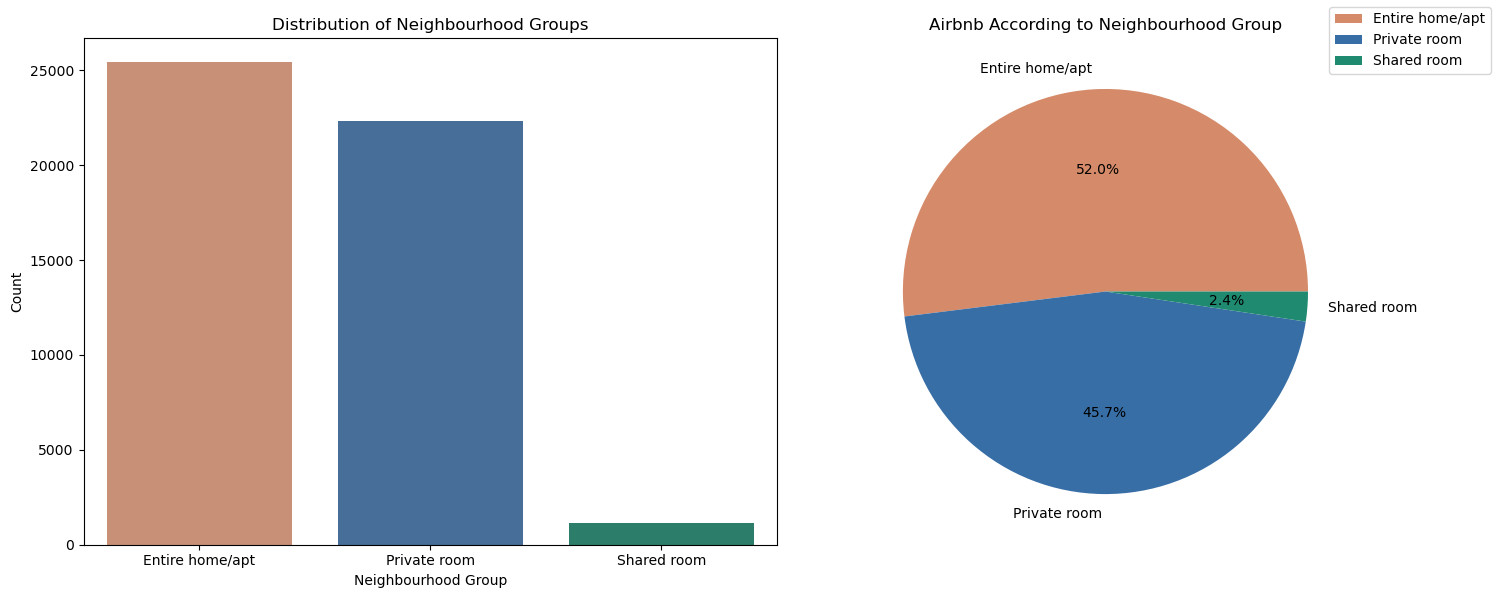

In [15]:
# Create plots for the distribution of neighbourhood groups focusing on the room type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Define labels, colors, explode settings, and sizes for neighbourhood groups
labels = bnb_df.room_type.value_counts().index
colors = ['#D58B69','#386EA6','#1F8A70']
explode = [0,0,0]
sizes = bnb_df.room_type.value_counts().values

# Count plot for neighbourhood groups
sns.countplot(x='room_type', hue='room_type', order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

# Pie chart for neighbourhood groups
ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

# Add legend and display plot
fig.legend()
plt.tight_layout()
plt.show()

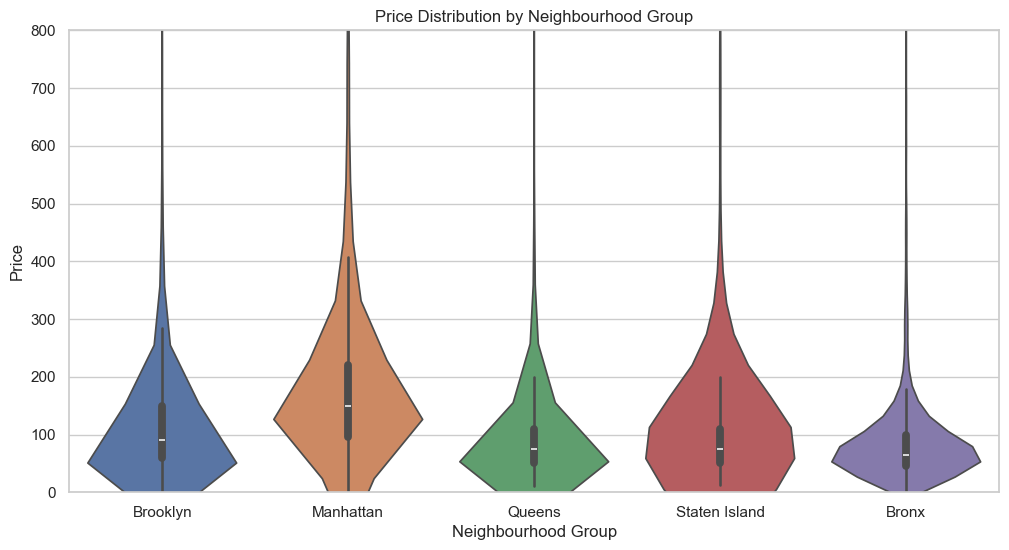

In [16]:
# Set Seaborn style to whitegrid
sns.set(style="whitegrid")

# Create a violin plot for price distribution by neighbourhood group
plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=bnb_df, hue='neighbourhood_group')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

# Set y-axis limit to show the results better
plt.ylim((0,800))
plt.show()

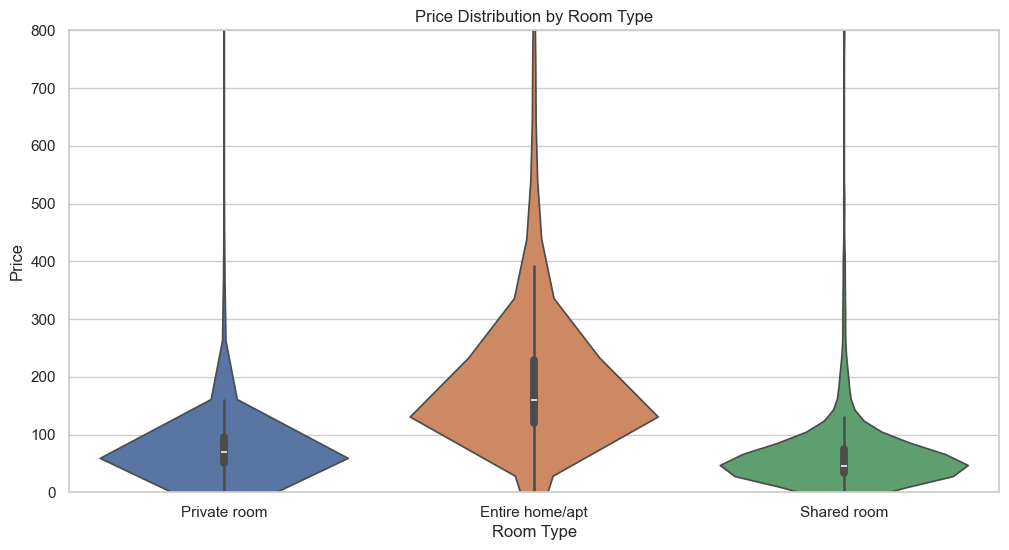

In [17]:
# Create a violin plot for price distribution by room type
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='price', data=bnb_df, hue='room_type')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type') 
plt.ylabel('Price')

# Set y-axis limit to show the results better
plt.ylim((0,800))
plt.show()

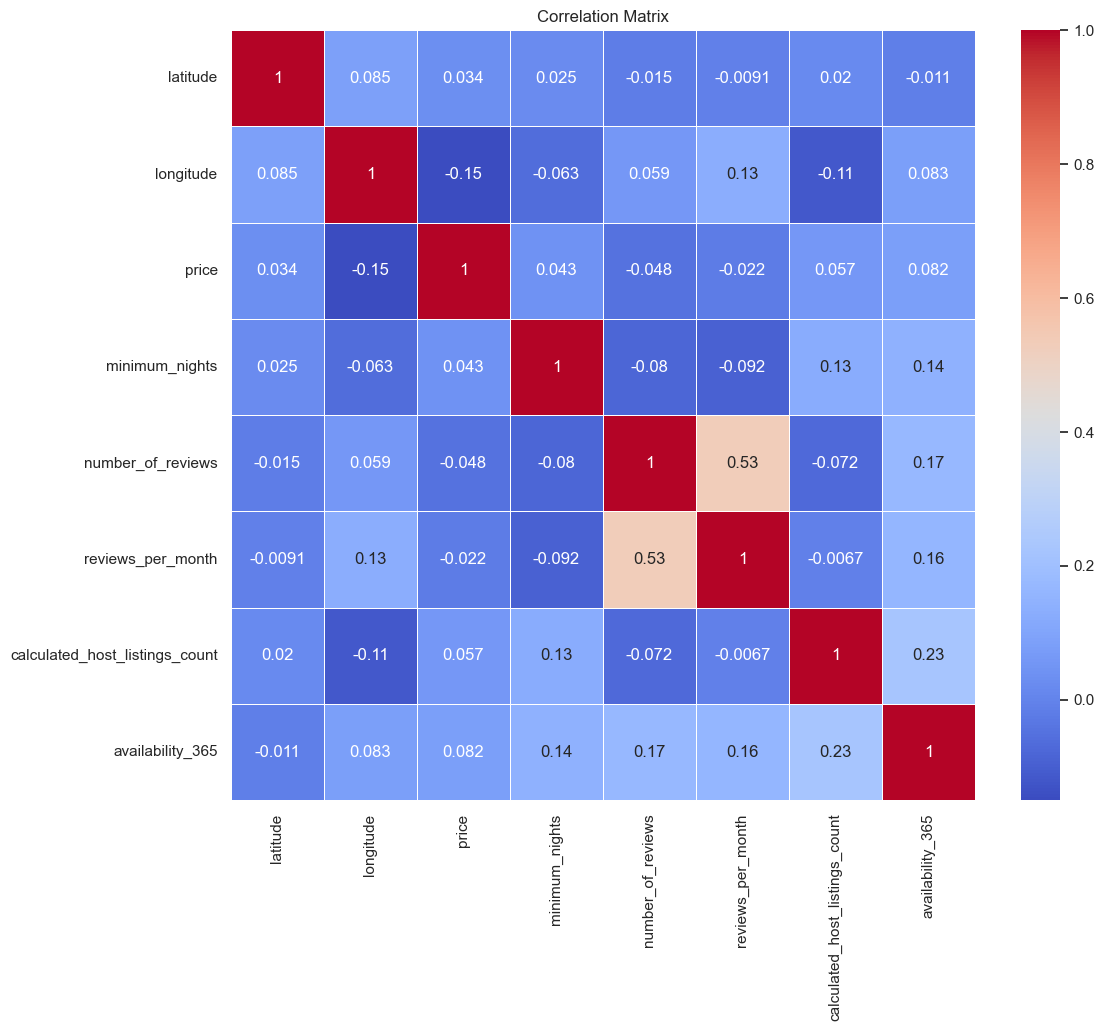

In [18]:
# Create and display a heatmap of the correlation matrix for numeric columns
plt.figure(figsize=(12, 10))
corr_matrix = bnb_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

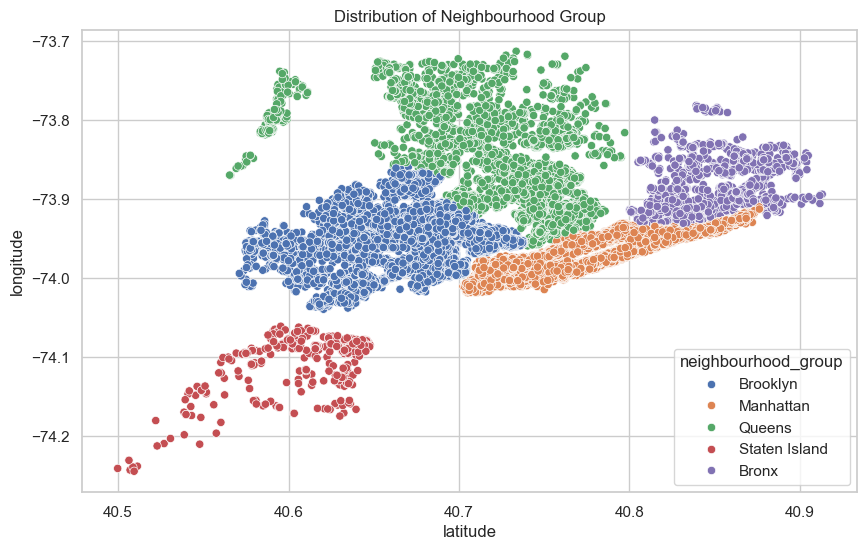

In [19]:
# Scatter plot showing the distribution of Airbnb listings colored by neighbourhood group
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')

plt.show()

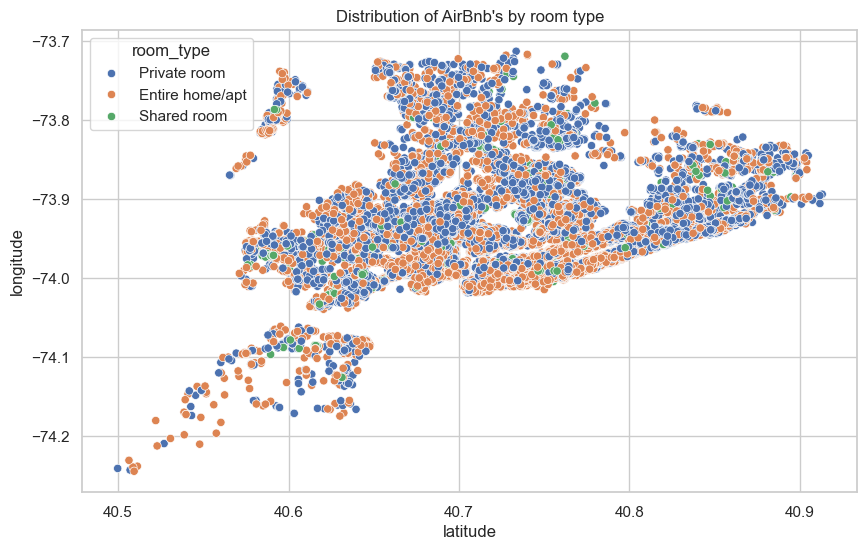

In [20]:
# Scatter plot showing the distribution of Airbnb listings colored by room type
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'room_type')
plt.title("Distribution of AirBnb's by room type")

plt.show()

<Figure size 1000x1000 with 0 Axes>

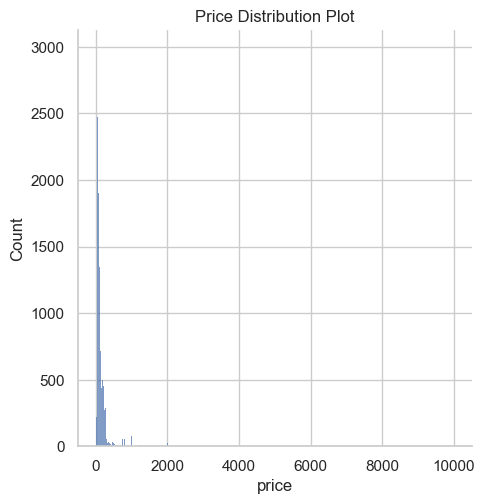

In [21]:
# Create and display the distribution of prices
plt.figure(figsize=(10,10))
sns.displot(bnb_df['price'])
plt.title("Price Distribution Plot")
plt.show()

<Figure size 1000x600 with 0 Axes>

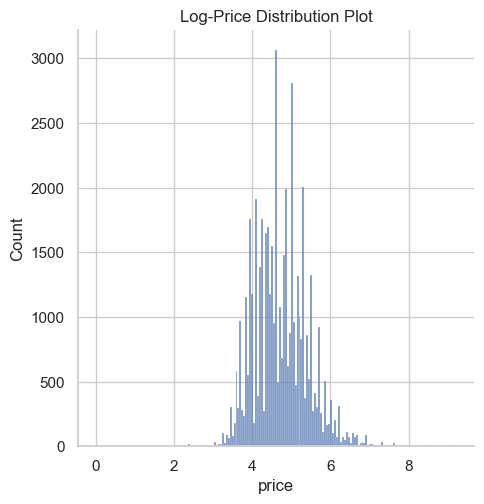

In [22]:
# Create and display the distribution of log-tranformed prices
plt.figure(figsize=(10,6))
sns.displot(np.log1p(bnb_df['price']))
plt.title("Log-Price Distribution Plot")
plt.show()

### Outlier Distribution

<Figure size 1000x600 with 0 Axes>

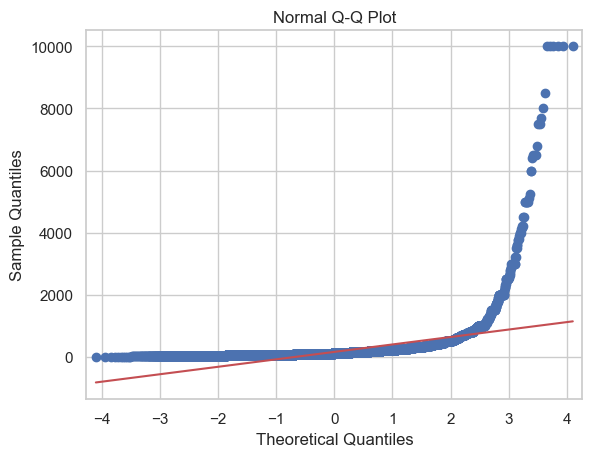

In [23]:
import statsmodels.api as sm

# Generate a Q-Q plot for the price
plt.figure(figsize=(10, 6))
sm.qqplot(bnb_df['price'], line='s')
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

The plot shows significant deviation from the straight line (red), especially in the upper tail. The data points form a curve, indicating that the data does not follow a normal distribution. Moreover, the extreme deviation in the upper tail suggests that the data has heavy tails. This means there are more extreme values in the dataset than would be expected in a normal distribution. The sharp curve on the right side suggests that the data is positively skewed, as we have shown in the graph above.

<Figure size 1000x600 with 0 Axes>

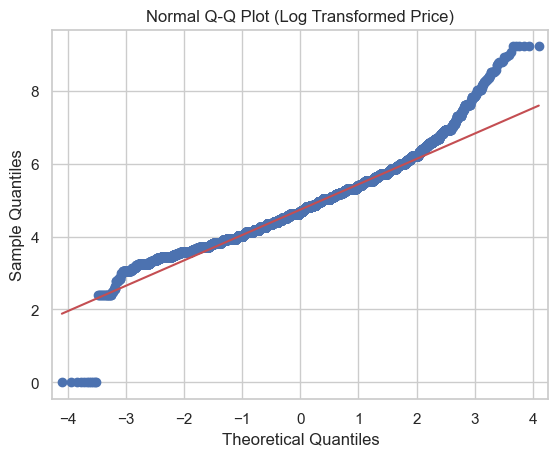

In [24]:
# Generate a Q-Q plot for the log-transformed price
plt.figure(figsize=(10, 6))
sm.qqplot(np.log1p(bnb_df['price']), line='s')
plt.title('Normal Q-Q Plot (Log Transformed Price)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Overall, this plot suggests that the log-transformed prices are approximately normal in the central range but the distribution has heavier tails (both left and right) compared to a normal distribution.

# 3. Feature Engeneering

Hot-One Encoding

In [25]:
# Convert categorical variables 'neighbourhood_group' and 'room_type' into dummy/indicator variables, dropping the first level to avoid multicollinearity
bnb_df = pd.get_dummies(bnb_df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [26]:
# Display the dataset to see the changes
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,True,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.380000,2,355,False,True,False,False,False,False
2,40.80902,-73.94190,150,3,0,1.373221,1,365,False,True,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.640000,1,194,True,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.100000,1,0,False,True,False,False,False,False


In [27]:
# Convert boolean columns to integers for better compatibility
for col in bnb_df.select_dtypes(include=['bool']).columns:
    bnb_df[col] = bnb_df[col].astype(int)

In [28]:
# Display the dataset to see the changes
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.380000,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.640000,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,0,1,0,0,0,0


In [29]:
# Print the max value of the price, minimum nights and number of reviews
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

10000 1250 629


As we have already seen, there are some extreme values in the price column but also in minimum nights and number of reviews. So we need to handle these outlier by capping.

In [30]:
# Create a function to calculate the outlier thresholds
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1) 
    quartile3 = dataframe[col_name].quantile(q3)

    # Calculate the interquartile range
    interquantile_range = quartile3 - quartile1

    # Define the upper and lower limits for detecting outliers
    up_limit = quartile3 + 1.5 * interquantile_range 
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [31]:
# create a function to check if there are outliers in a column of a dataframe
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [32]:
# Function to replace the outliers with threshold values
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
# List of numerical feature
numerical_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room']

In [34]:
# Combine the functions
for col in numerical_features:
   if check_outlier(bnb_df, col):
      replace_with_thresholds(bnb_df, col)

C:\Users\giohy\AppData\Local\Temp\ipykernel_15716\1361679632.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1123.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [35]:
# Print the max value of the price, minimum nights and number of reviews to check the results
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

1952.5 111 535


In [36]:
bnb_df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149.0,1,9,0.210000,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225.0,1,45,0.380000,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150.0,3,0,1.373221,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89.0,1,270,4.640000,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80.0,10,9,0.100000,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70.0,2,0,1.373221,2,9,1,0,0,0,1,0
48891,40.70184,-73.93317,40.0,4,0,1.373221,2,36,1,0,0,0,1,0
48892,40.81475,-73.94867,115.0,10,0,1.373221,1,27,0,1,0,0,0,0
48893,40.75751,-73.99112,55.0,1,0,1.373221,6,2,0,1,0,0,0,1


In [37]:
# Create a new column with the log-tranformed price
bnb_df['log_price'] = np.log1p(bnb_df['price'])

In [38]:
# Drop the price column
bnb_df.drop('price', axis= 1, inplace=True)

In [39]:
# create sub-df
bnb_df_x = bnb_df.drop('log_price', axis = 1)
bnb_df_y = bnb_df['log_price']

d:\anaconda\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


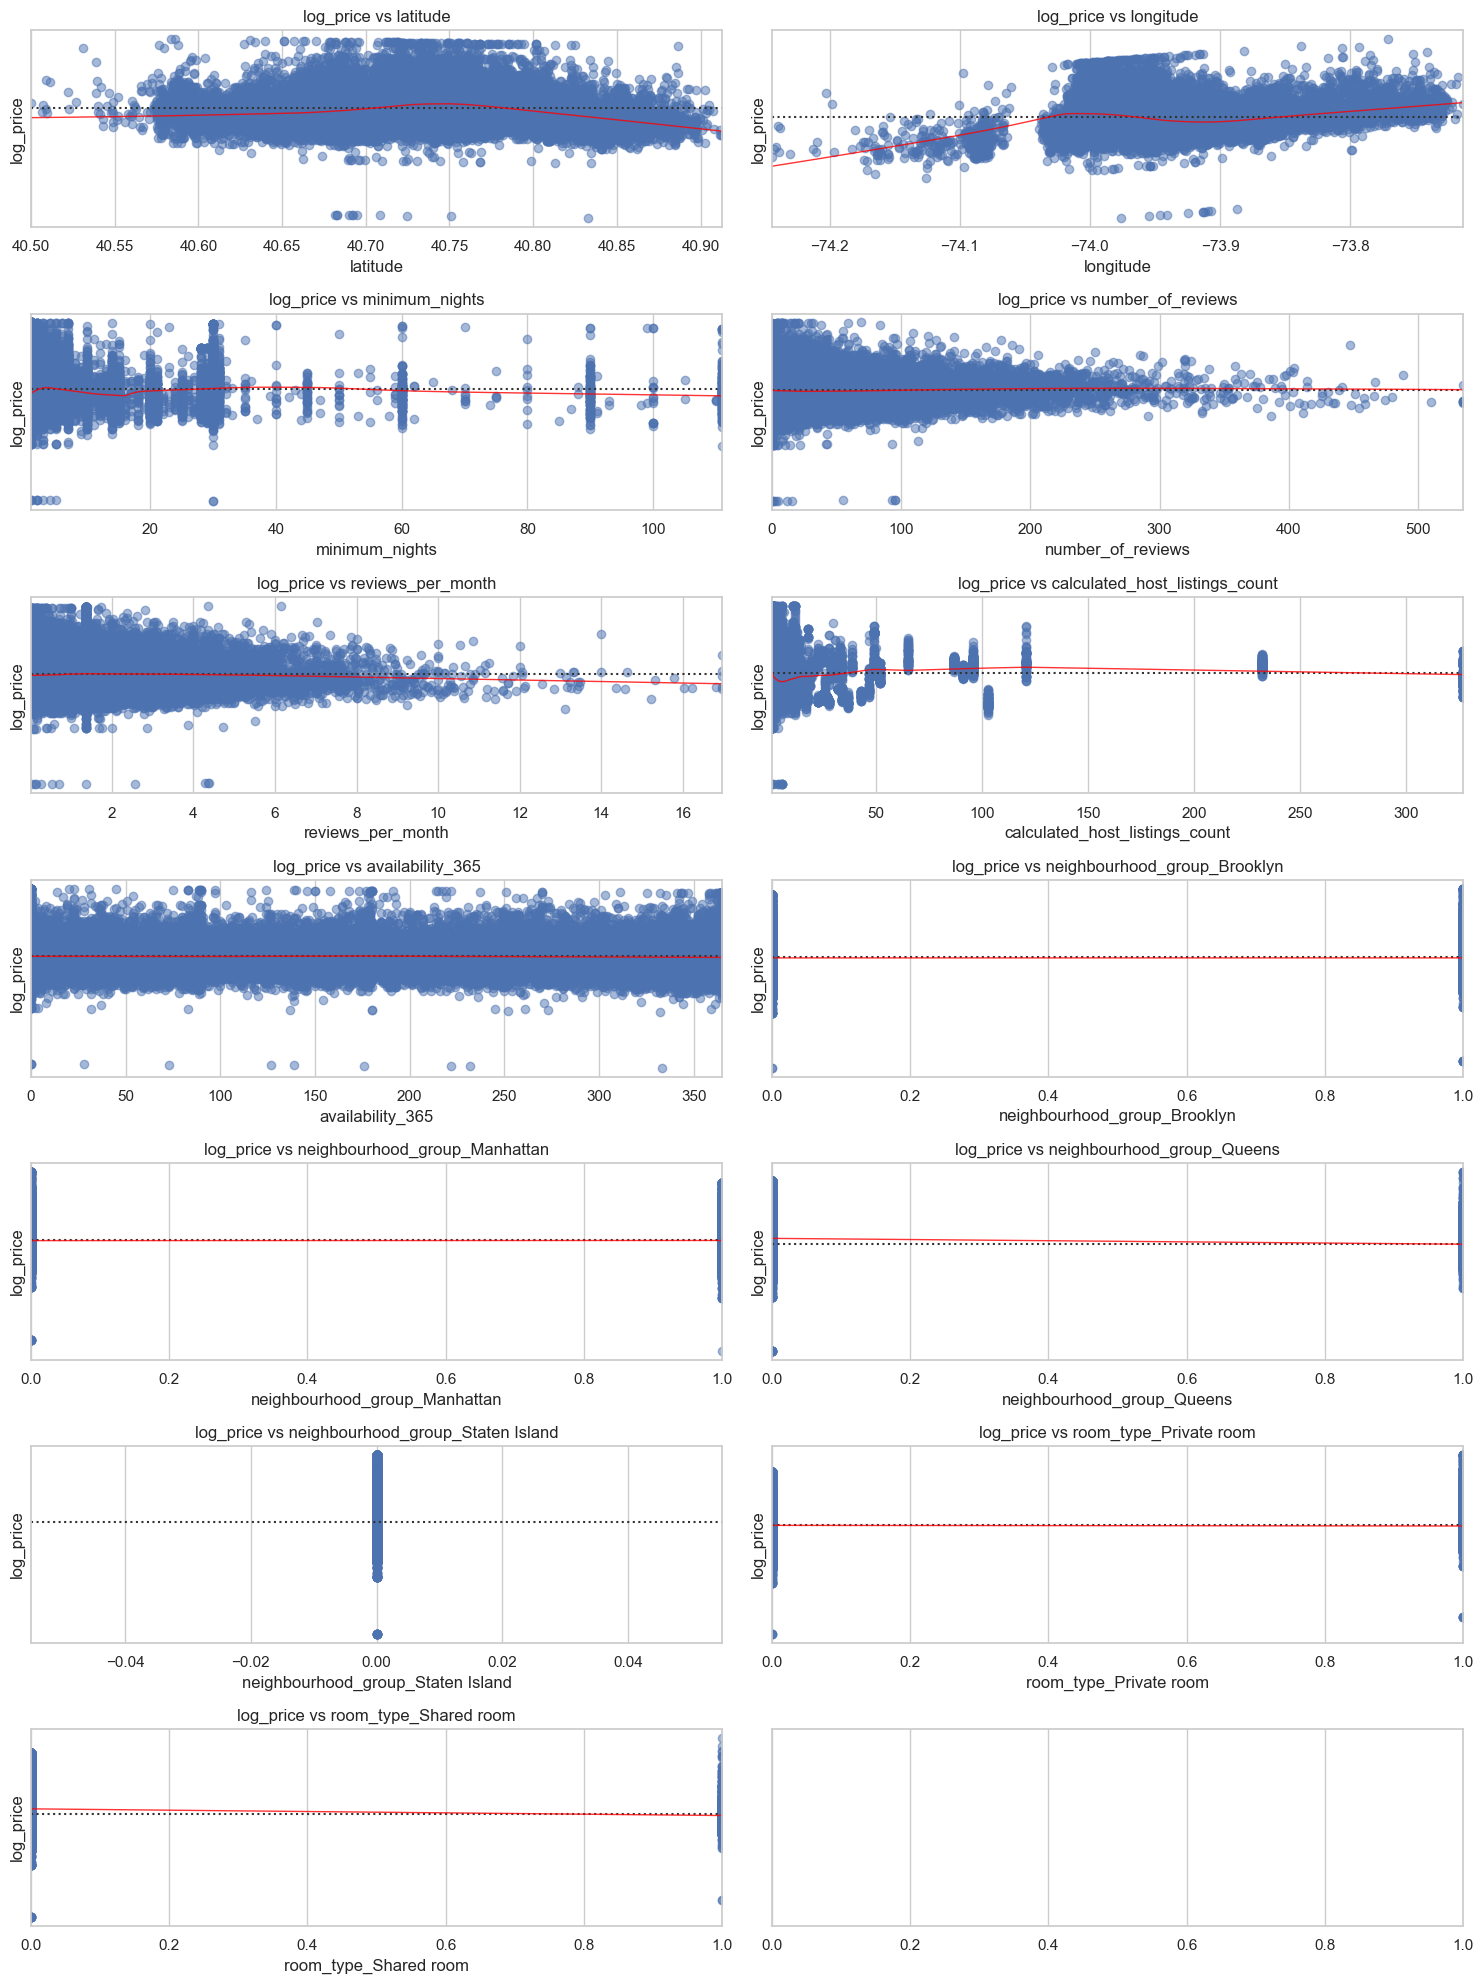

In [40]:
f, axes = plt.subplots(7, 2, figsize=(15, 20))

# Iterate over 13 columns in bnb_df_x
for i in range(13):
    row = i // 2
    col = i % 2

    # Create a residual plot for bnb_df_y (log_price) against the i-th column of bnb_df_x
    sns.residplot(x=bnb_df_x.iloc[:, i], y=bnb_df_y, lowess=True, ax=axes[row, col],
                  scatter_kws={'alpha': 0.5}, 
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    axes[row, col].set_title(f'log_price vs {bnb_df_x.columns[i]}')
    axes[row, col].set_ylabel('log_price')
    axes[row, col].set_xlabel(bnb_df_x.columns[i])

# Remove y-axis ticks from all subplots and display the plots
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

This plots provide a visual inspection of the relationship between each predictor variable and 'log-price'

# 4. Model

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

# Create a new class for the models
class Model:

    # Initialize the model object and parameters
    def __init__(self, model, name=None, scaled=False):
        self.model = model
        self.name = name
        self.scaled = scaled

    # Fit the model to the training data
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    # Get prediction on the test data     
    def __get_predictions(self, X_test):
        return self.model.predict(X_test)

    # Calculate evaluation metrics for the model
    def get_metrics(self, X_test, y_test) -> pd.Series:
        y_pred = self.__get_predictions(X_test)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        r2 = metrics.r2_score(y_test, y_pred)
        metrics_series = pd.Series({
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R^2': r2,
            'Name': self.name if self.name else type(self.model).__name__
        })
        return metrics_series
    
    # Perform cross-validation and calculate evaluation metrics
    def cross_validate(self, X, y, cv):

        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        mse_scores = cross_val_score(self.model, X, y, scoring='neg_mean_squared_error', cv=kf)
        rmse_scores = np.sqrt(-mse_scores)
        mae_scores = cross_val_score(self.model, X, y, scoring='neg_mean_absolute_error', cv=kf)
        r2_scores = cross_val_score(self.model, X, y, scoring='r2', cv=kf)

        metrics_series = pd.Series({
            'MSE': -np.mean(mse_scores),
            'RMSE': np.mean(rmse_scores),
            'MAE': -np.mean(mae_scores),
            'R^2': np.mean(r2_scores),
            'Name': self.name if self.name else type(self.model).__name__
        })
        return metrics_series
    
    # Plots to visualize model evaluation metrics
    def visualize_metrics(self, X_test, y_test):
        y_pred = self.__get_predictions(X_test)

        residuals = y_test - y_pred
        
        plt.figure(figsize=(15, 10))
        
        # residuals distribution
        plt.subplot(2, 2, 1)
        sns.histplot(residuals, bins=30, edgecolor='black', kde=True)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Distribution of Residuals')

        # predicted vs actual values
        plt.subplot(2, 2, 2)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted')

        # residuals vs fitted values
        plt.subplot(2, 2, 3)
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Fitted Values')

        # QQ Plot for Residuals
        plt.subplot(2, 2, 4)
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title('Normal Q-Q Plot (Residuals)')

        plt.tight_layout()
        plt.show()


In [42]:
# Create a df for the metrics
metrics_df = pd.DataFrame(columns=['Name',
            'MSE',
            'RMSE',
            'MAE',
            'R^2'])

In [43]:
# Features and target variable
X = bnb_df.drop('log_price', axis = 1)
y = bnb_df['log_price']

In [44]:
# Standardization of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
# Create training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Multiple Linear Legression

In [46]:
# Create a Linear Regression model
lr_model = Model(LinearRegression(), name='Linear Regression')

# Fit to the training data
lr_model.fit(X_train,y_train)

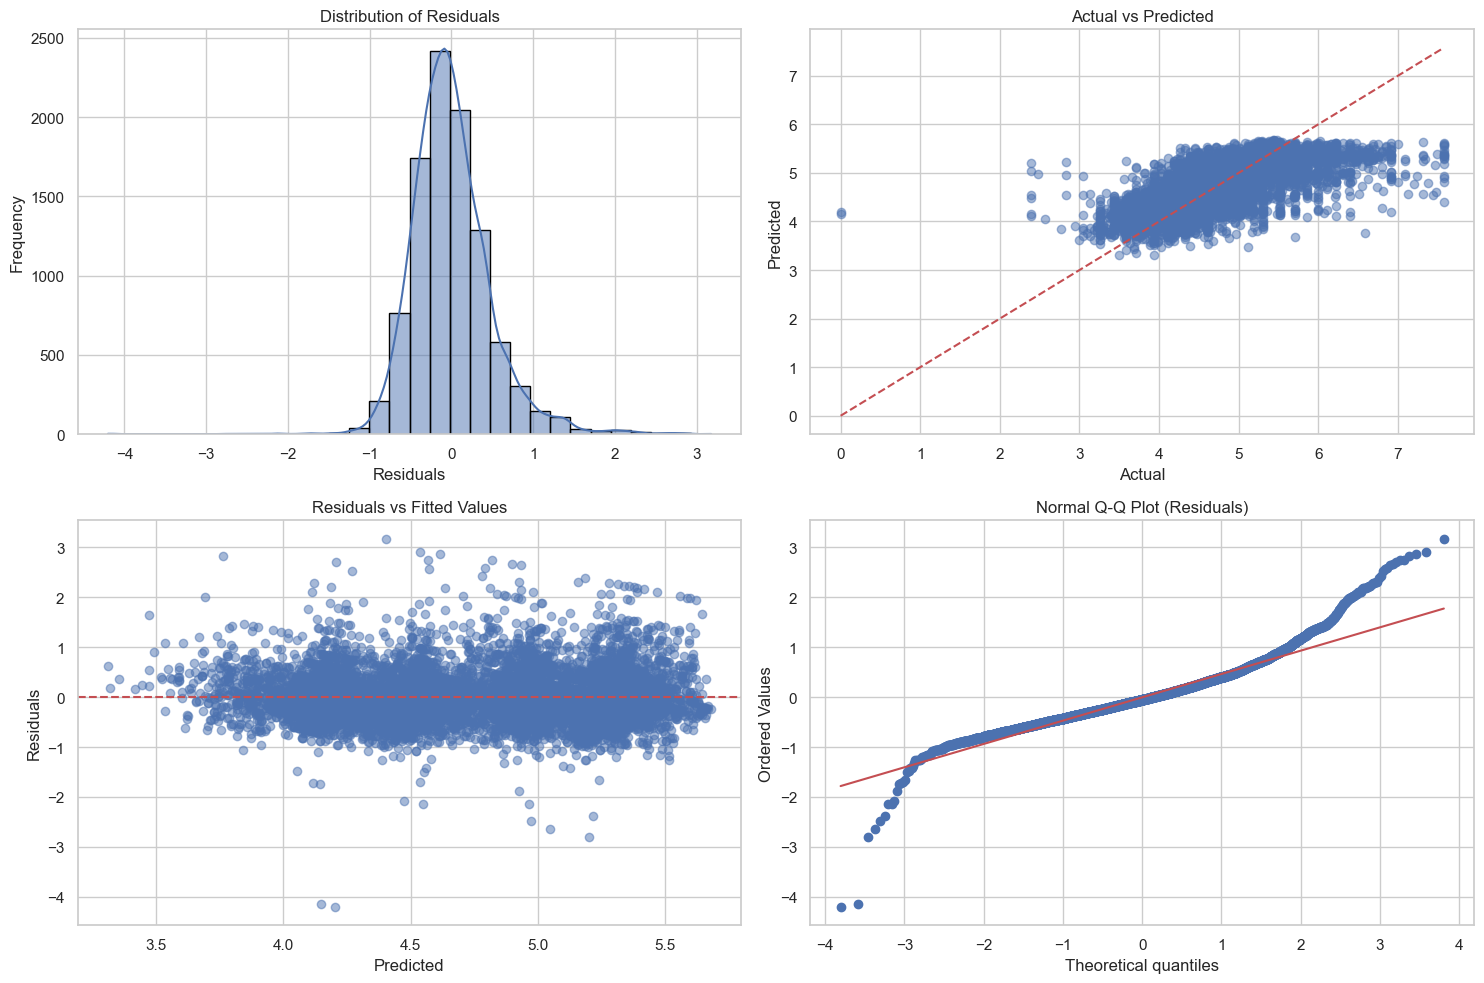

In [47]:
# Visualize the metrics
lr_model.visualize_metrics(X_test,y_test)

In [48]:
# Print evaluetion metrics
metrics_lr = lr_model.get_metrics(X_test,y_test)
print(metrics_lr)

MSE              0.231652
RMSE             0.481303
MAE              0.353695
R^2              0.505251
Name    Linear Regression
dtype: object


In [49]:
# Perform cross-validation
lr_model.cross_validate(X, y, 5)

MSE              0.240416
RMSE             0.490257
MAE               0.35773
R^2              0.494524
Name    Linear Regression
dtype: object

In [50]:
# Adding metrics to  metrics_df
metrics_df = pd.concat([metrics_df, metrics_lr.to_frame().T])

## Lasso Regression

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Searching the best alphas for Lasso
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Dictionary to store the metrics results
lasso_results = {}

# Create and evaluate the lasso model for each alpha
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    lasso_results[alpha] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Printing the results    
print("\nResults:")
for alpha, performance in lasso_results.items():
    print(f"Alpha: {alpha}, MSE: {performance['MSE']}, R^2: {performance['R^2']}")


Results:
Alpha: 0.0001, MSE: 0.23164268569136715, R^2: 0.5052711602869563
Alpha: 0.001, MSE: 0.2316325345329878, R^2: 0.5052928405346695
Alpha: 0.01, MSE: 0.23437873926647132, R^2: 0.4994276577970589
Alpha: 0.1, MSE: 0.2780571595470197, R^2: 0.4061418537519208
Alpha: 1, MSE: 0.4683857449746665, R^2: -0.0003507577104655546
Alpha: 10, MSE: 0.4683857449746665, R^2: -0.0003507577104655546
Alpha: 100, MSE: 0.4683857449746665, R^2: -0.0003507577104655546


In [52]:
# Selecting and printing the best results
best_lasso_alpha = max(lasso_results, key=lambda x: (lasso_results[x]['R^2'], -lasso_results[x]['MSE']))
print(f"Best Alpha for Lasso: {best_lasso_alpha} with R^2: {lasso_results[best_lasso_alpha]['R^2']} and MSE: {lasso_results[best_lasso_alpha]['MSE']}")

Best Alpha for Lasso: 0.001 with R^2: 0.5052928405346695 and MSE: 0.2316325345329878


In [53]:
# Create a Linear Regression model
lasso_model = Model(Lasso(alpha=best_lasso_alpha), name='Lasso')

# Fit to the training data
lasso_model.fit(X_train, y_train)

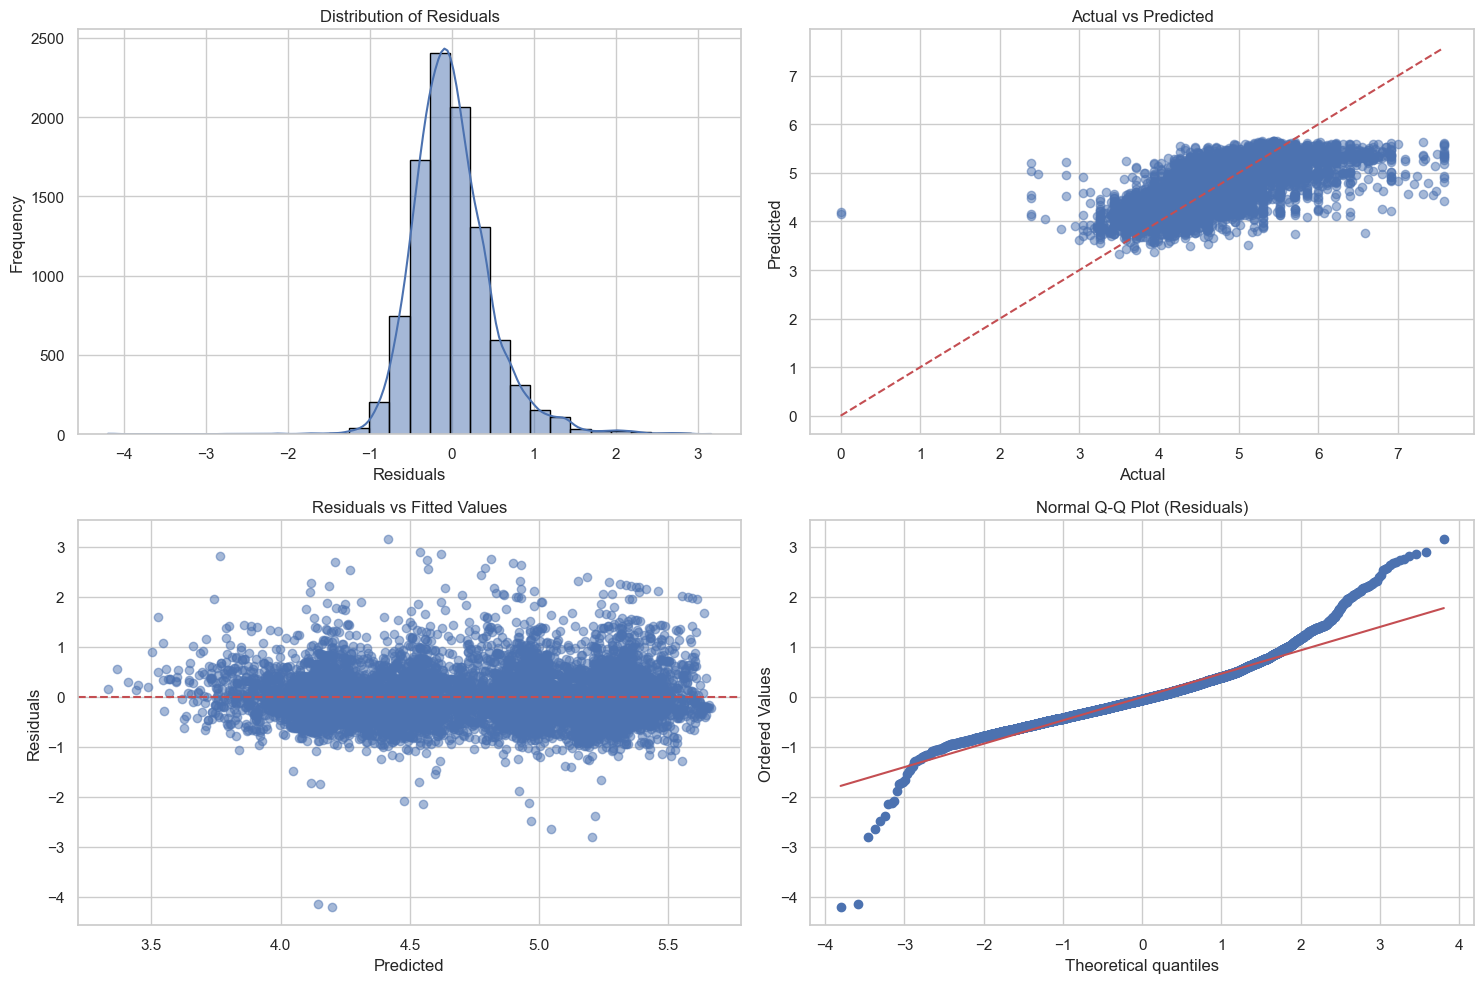

In [54]:
# Visualize the metrics
lasso_model.visualize_metrics(X_test, y_test)

In [55]:
# Print evaluetion metrics
metrics_lasso = lasso_model.get_metrics(X_test,y_test)
print(metrics_lasso)

MSE     0.231633
RMSE    0.481282
MAE     0.353465
R^2     0.505293
Name       Lasso
dtype: object


In [56]:
# Perform cross-validation
lasso_model.cross_validate(X, y, 5)

MSE     0.240494
RMSE    0.490336
MAE     0.357652
R^2     0.494363
Name       Lasso
dtype: object

In [57]:
# Adding metrics to  metrics_df
metrics_df = pd.concat([metrics_df, metrics_lasso.to_frame().T])

## Ridge Regression

In [58]:
# Dictionary to store the metrics results
ridge_results = {}

# Create and evaluate the lasso model for each alpha
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    ridge_results[alpha] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Printing the results  
print("\nResults:")
for alpha, performance in ridge_results.items():
    print(f"Alpha: {alpha}, MSE: {performance['MSE']}, R^2: {performance['R^2']}")


Results:
Alpha: 0.0001, MSE: 0.23165210412386195, R^2: 0.5052510449521416
Alpha: 0.001, MSE: 0.23165210368278424, R^2: 0.5052510458941694
Alpha: 0.01, MSE: 0.23165209927217179, R^2: 0.5052510553140963
Alpha: 0.1, MSE: 0.23165205518242332, R^2: 0.505251149478391
Alpha: 1, MSE: 0.23165161592098013, R^2: 0.505252087627176
Alpha: 10, MSE: 0.23164738535710194, R^2: 0.5052611230169726
Alpha: 100, MSE: 0.23161985231046822, R^2: 0.5053199264804802


In [59]:
# Selecting and printing the best results
best_ridge_alpha = max(ridge_results, key=lambda x: (ridge_results[x]['R^2'], -ridge_results[x]['MSE']))
print(f"\nBest Alpha for Ridge: {best_ridge_alpha} with R^2: {ridge_results[best_ridge_alpha]['R^2']} and MSE: {ridge_results[best_ridge_alpha]['MSE']}")


Best Alpha for Ridge: 100 with R^2: 0.5053199264804802 and MSE: 0.23161985231046822


In [60]:
# Create a Ridge Regression model
ridge_model = Model(Ridge(alpha=best_ridge_alpha), name='Ridge')

# Fit to the training data
ridge_model.fit(X_train, y_train)

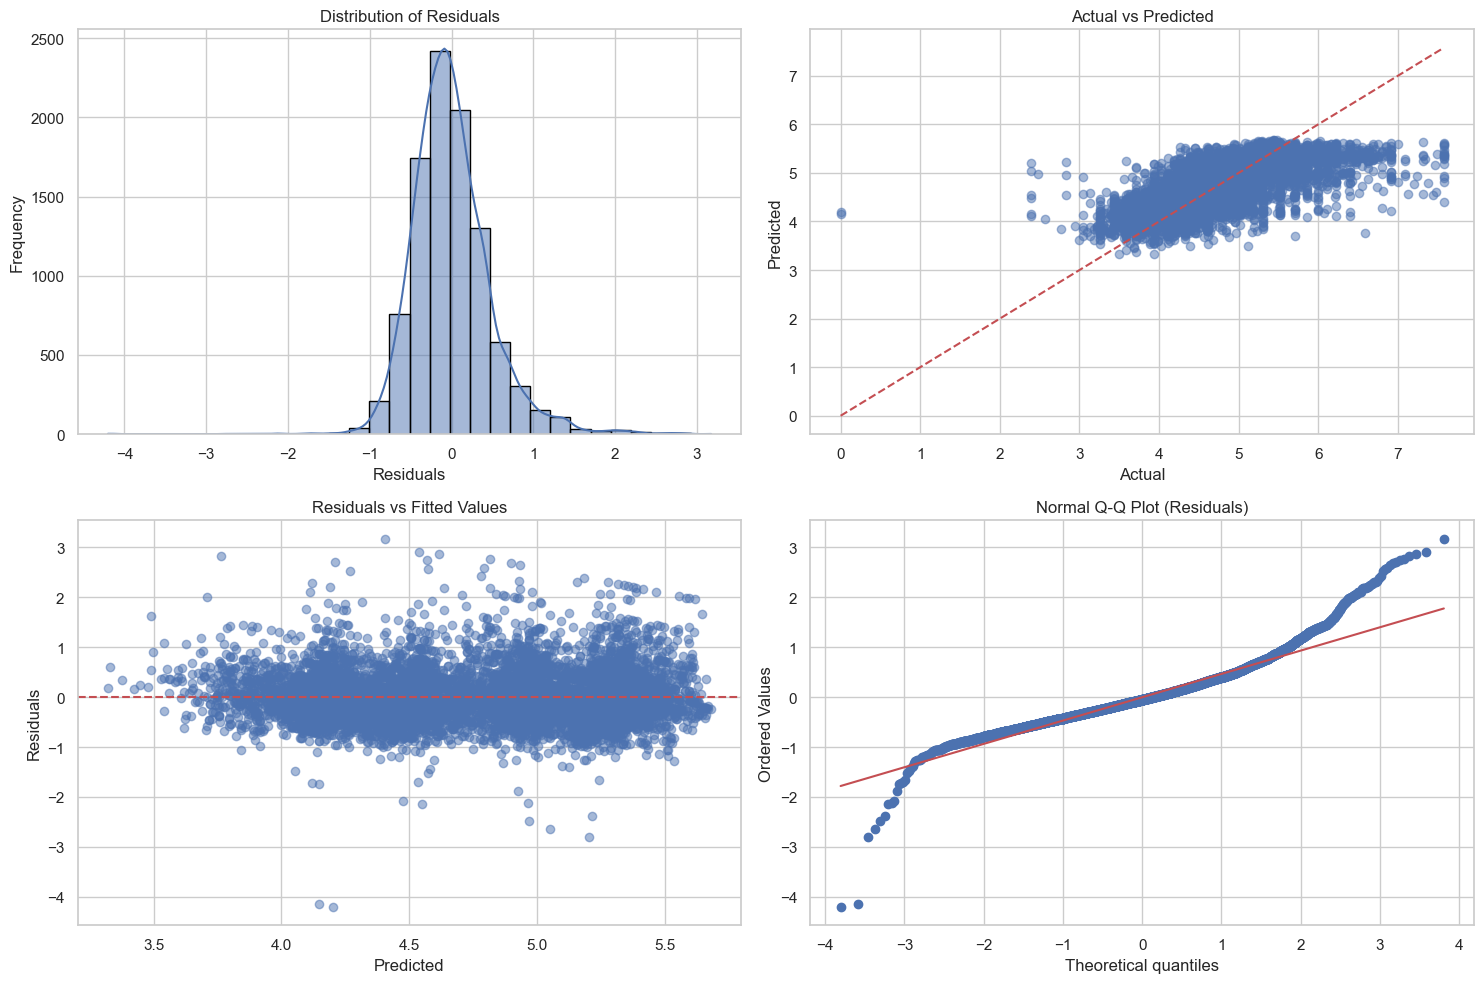

In [61]:
# Visualize the metrics
ridge_model.visualize_metrics(X_test, y_test)

In [62]:
# Print evaluetion metrics
metrics_ridge = ridge_model.get_metrics(X_test, y_test)
print(metrics_ridge)

MSE      0.23162
RMSE    0.481269
MAE     0.353589
R^2      0.50532
Name       Ridge
dtype: object


In [63]:
# Perform cross-validation
ridge_model.cross_validate(X, y, 5)

MSE     0.240427
RMSE    0.490268
MAE     0.357682
R^2     0.494503
Name       Ridge
dtype: object

In [64]:
# Adding metrics to  metrics_df
metrics_df = pd.concat([metrics_df, metrics_ridge.to_frame().T])

## Decision Tree

In [66]:
# create a list to store r^2 scores
max_d = []

# Create and Evaluate the models with different depth
for i in range(1,10):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    max_d.append(round(metrics.r2_score(y_test,y_pred),5))

# Print the results    
print(f'Best max depth: {max_d.index(max(max_d))}')
print(f'R^2: {max(max_d)}')

Best max depth: 6
R^2: 0.56088


In [67]:
# Create a Decision Tree model
dt_model = Model(DecisionTreeRegressor(max_depth=max_d.index(max(max_d)), random_state=42), name= 'Decision Tree')

In [68]:
# Fit to the training data
dt_model.fit(X_train, y_train)

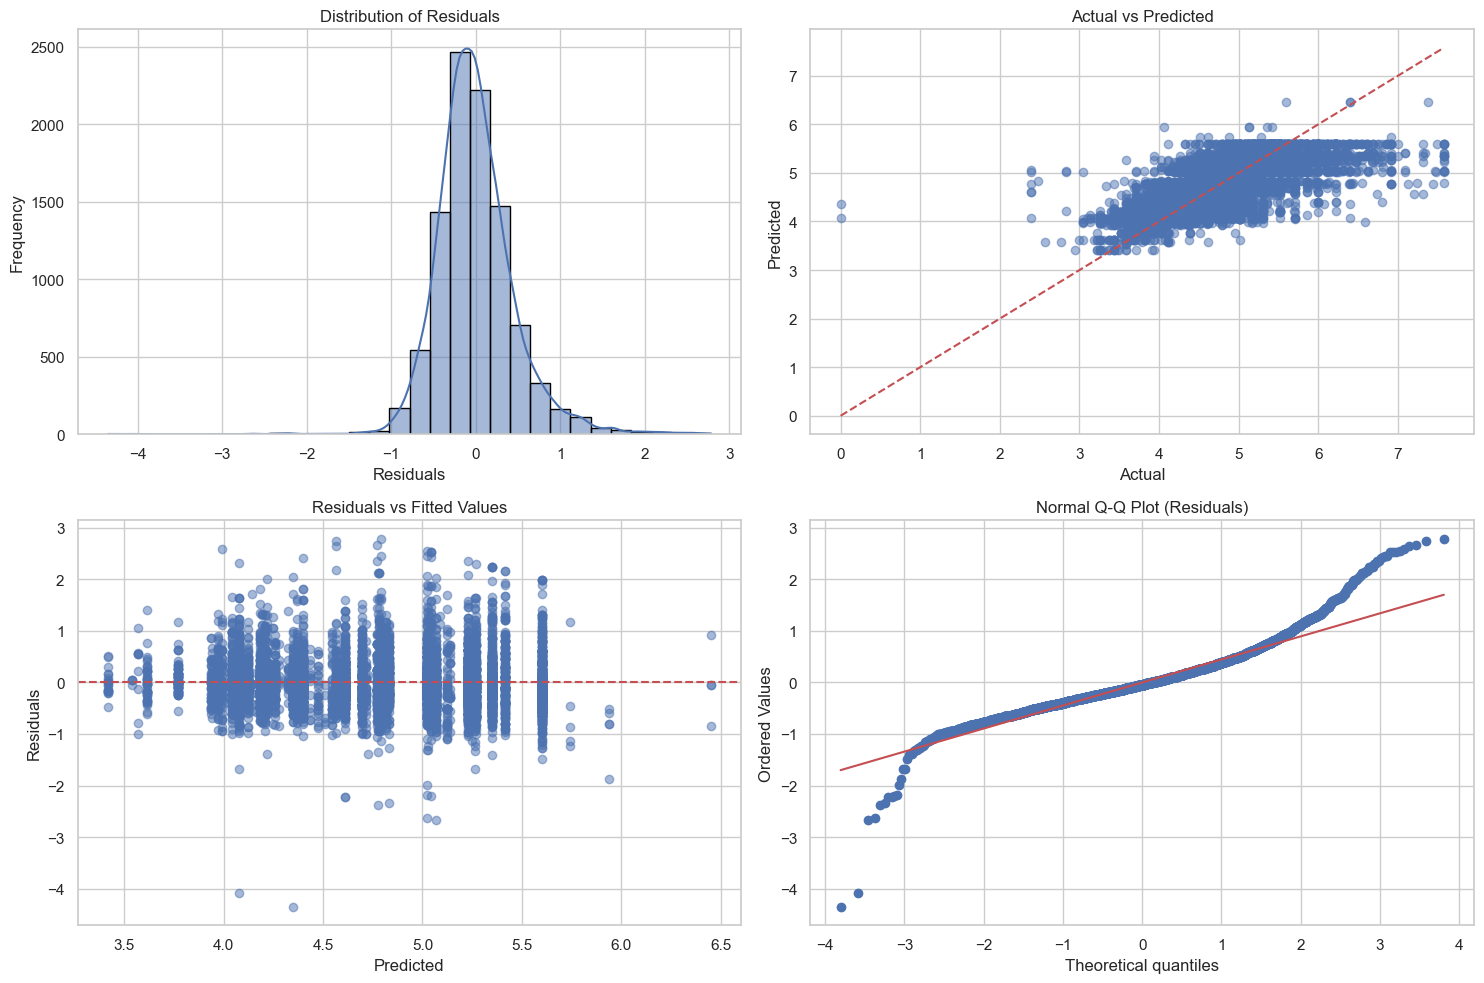

In [69]:
# Visualize the metrics
dt_model.visualize_metrics(X_test, y_test)

In [70]:
# Print evaluetion metrics
metrics_dt = dt_model.get_metrics(X_test, y_test)
print(metrics_dt)

MSE           0.21218
RMSE          0.46063
MAE          0.335348
R^2          0.546839
Name    Decision Tree
dtype: object


In [71]:
# Perform cross-validation
dt_model.cross_validate(X,y, 5)

MSE          0.220036
RMSE         0.469001
MAE          0.338284
R^2          0.537404
Name    Decision Tree
dtype: object

In [72]:
# Adding metrics to  metrics_df
metrics_df = pd.concat([metrics_df, metrics_dt.to_frame().T])

## Random Forest Regressor

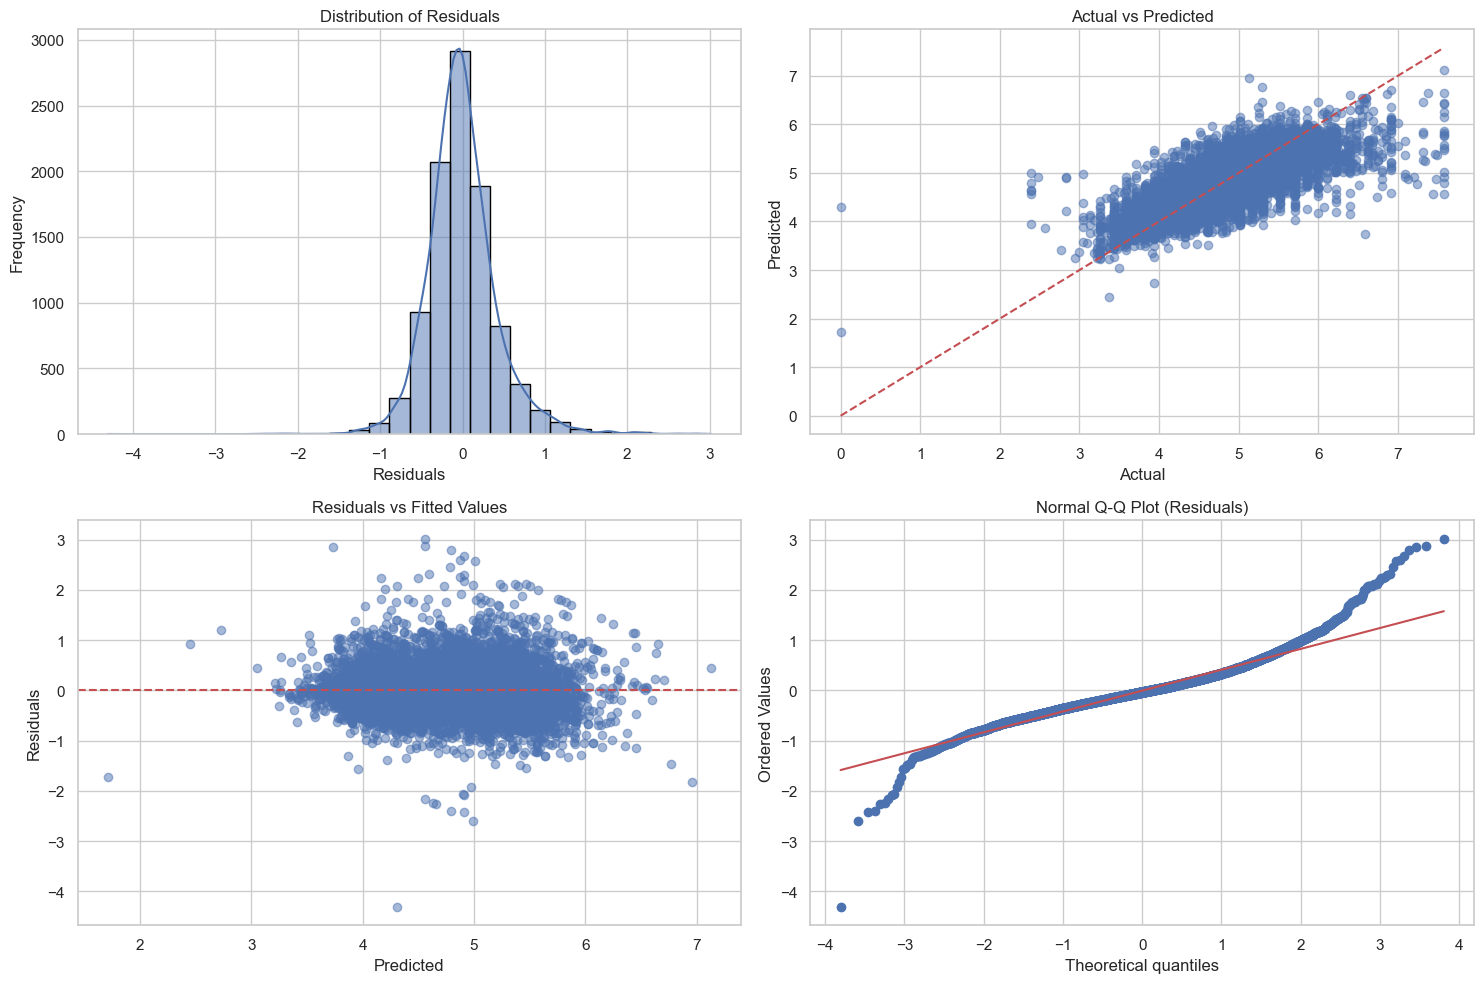

In [73]:
# Create a Random Forest Regressor model
rf_model = Model(RandomForestRegressor(n_estimators=100, random_state=42), name='Random Forest Regressor')

# Fit to the training data
rf_model.fit(X_train, y_train)

# Visualize the metrics
rf_model.visualize_metrics(X_test, y_test)

In [74]:
# Print evaluetion metrics
metrics_rf = rf_model.get_metrics(X_test, y_test)
print(metrics_rf)

MSE                    0.182253
RMSE                   0.426911
MAE                    0.306478
R^2                    0.610755
Name    Random Forest Regressor
dtype: object


In [75]:
# Perform cross-validation
rf_model.cross_validate(X,y,5)

MSE                    0.189675
RMSE                   0.435416
MAE                    0.310022
R^2                    0.601259
Name    Random Forest Regressor
dtype: object

In [76]:
# Adding metrics to  metrics_df
metrics_df = pd.concat([metrics_df, metrics_rf.to_frame().T])

Text(0.5, 1.0, 'Feature importance Random Forest Regressor')

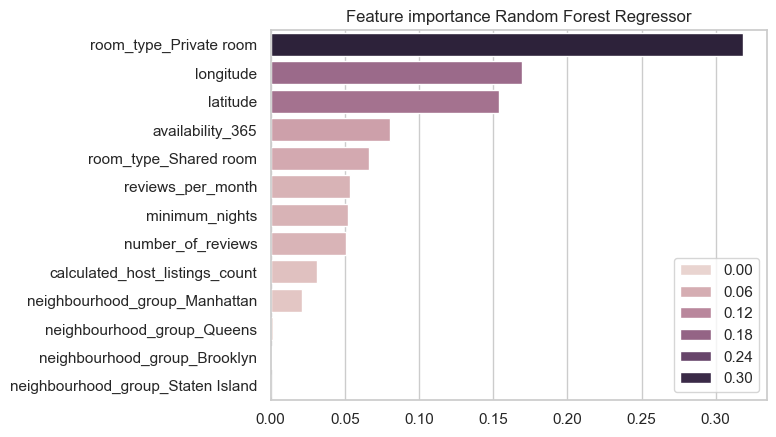

In [77]:
# Get the indices of features sorted by their importance
sorted_idx = rf_model.model.feature_importances_.argsort()[::-1]
cols  = []
columns = bnb_df.columns
for i in sorted_idx:
    cols.append(columns[i])

# Create a bar plot to visualize feature importances
sns.barplot(y=cols, x=rf_model.model.feature_importances_[sorted_idx], hue=rf_model.model.feature_importances_[sorted_idx])
plt.title('Feature importance Random Forest Regressor')

## XGBoost Regressor

In [78]:
# Create a XGBoost Regressor model
xgb_model = Model(XGBRegressor(), name='XGB Regressor')

In [79]:
# Fit to the training data
xgb_model.fit(X_train, y_train)

In [80]:
#xgb_model.cross_validate(X_test, y_test, 5)

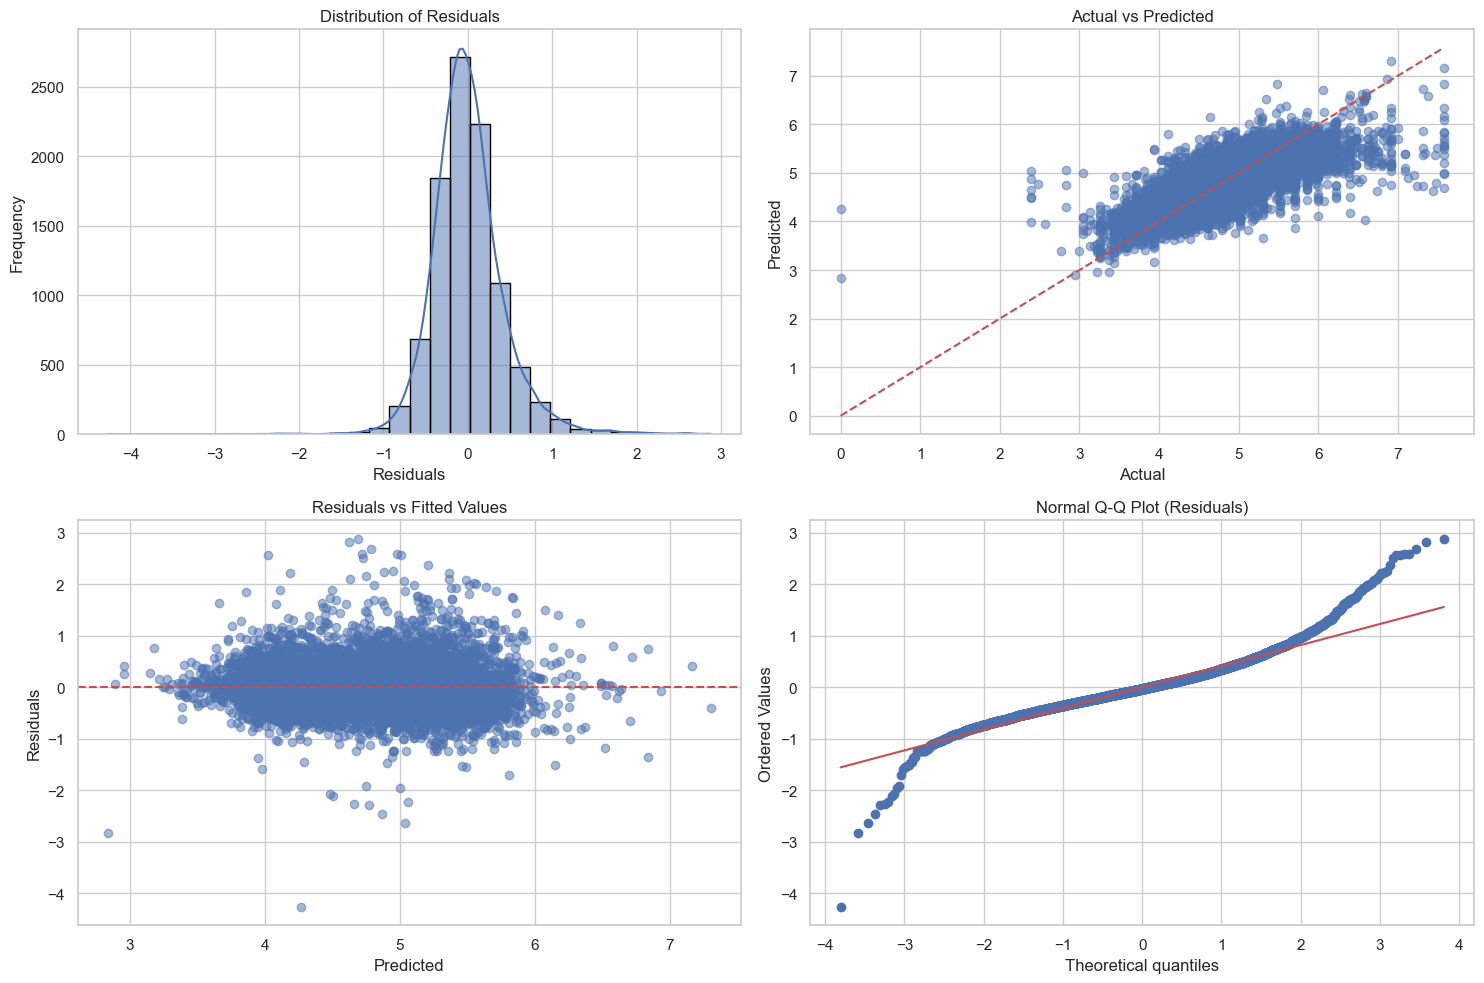

In [81]:
# Visualize the metrics
xgb_model.visualize_metrics(X_test, y_test)

In [82]:
# Print evaluetion metrics
metrics_xgb = xgb_model.get_metrics(X_test, y_test)
print(metrics_xgb)

MSE          0.177267
RMSE         0.421031
MAE          0.304692
R^2          0.621404
Name    XGB Regressor
dtype: object


In [83]:
# Perform cross-validation
xgb_model.cross_validate(X,y,5)

MSE          0.185865
RMSE         0.431022
MAE          0.308729
R^2          0.609251
Name    XGB Regressor
dtype: object

In [84]:
# Adding metrics to  metrics_df
metrics_df = pd.concat([metrics_df, metrics_xgb.to_frame().T])

Text(0.5, 1.0, 'Feature importance XGBoost')

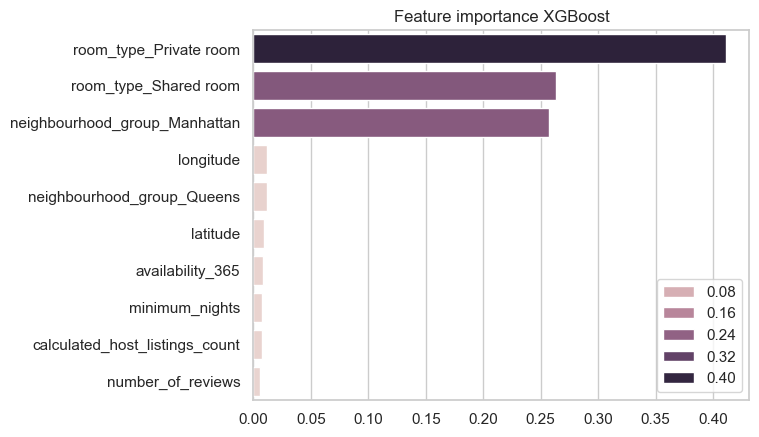

In [85]:
# Get the indices of features sorted by their importance
sorted_idx = xgb_model.model.feature_importances_.argsort()[::-1]
cols  = []
columns = bnb_df.columns
for i in sorted_idx:
    cols.append(columns[i])

# Create a bar plot to visualize feature importances
sns.barplot(y=cols[:10], x=xgb_model.model.feature_importances_[sorted_idx][:10], hue=xgb_model.model.feature_importances_[sorted_idx][:10])
plt.title('Feature importance XGBoost')

In [86]:
# Set Name column as index and drop it
metrics_df.index = metrics_df.Name
metrics_df = metrics_df.drop('Name',axis=1)

In [87]:
# Show the df
metrics_df

,MSE,RMSE,MAE,R^2
Name,,,,
Linear Regression,0.231652,0.481303,0.353695,0.505251
Lasso,0.231633,0.481282,0.353465,0.505293
Ridge,0.23162,0.481269,0.353589,0.50532
Decision Tree,0.21218,0.46063,0.335348,0.546839
Random Forest Regressor,0.182253,0.426911,0.306478,0.610755
XGB Regressor,0.177267,0.421031,0.304692,0.621404


C:\Users\giohy\AppData\Local\Temp\ipykernel_15716\2672293983.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')
C:\Users\giohy\AppData\Local\Temp\ipykernel_15716\2672293983.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')
C:\Users\giohy\AppData\Local\Temp\ipykernel_15716\2672293983.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')
C:\Users\giohy\AppData\Local\Temp\ipykernel_15716\2672293983.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

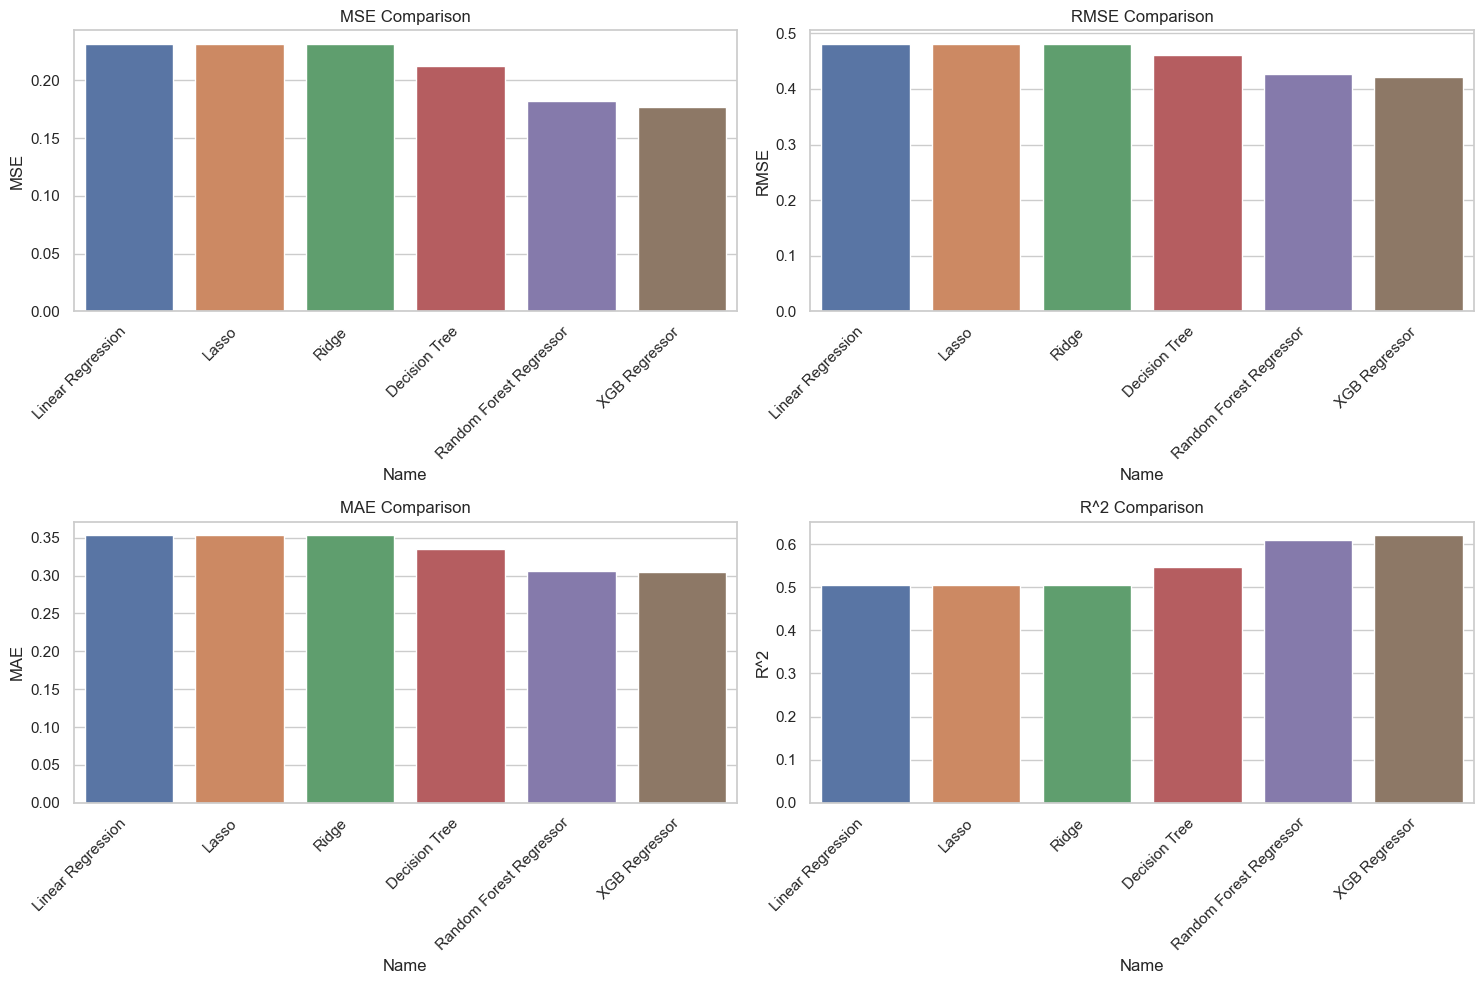

In [88]:
# Create some plots to visually compare the results of the models
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# MSE
sns.barplot(x=metrics_df.index, y=metrics_df['MSE'], ax=axes[0, 0], hue=metrics_df.index)
axes[0, 0].set_title('MSE Comparison')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# RMSE
sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'], ax=axes[0, 1], hue=metrics_df.index)
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# MAE
sns.barplot(x=metrics_df.index, y=metrics_df['MAE'], ax=axes[1, 0], hue=metrics_df.index)
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# R^2
sns.barplot(x=metrics_df.index, y=metrics_df['R^2'], ax=axes[1, 1], hue=metrics_df.index)
axes[1, 1].set_title('R^2 Comparison')
axes[1, 1].set_ylabel('R^2')
axes[1, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [89]:
# Print the lowest errors among the models
for col in metrics_df.columns:
    if col != 'R^2':
        print(metrics_df.sort_values(by=col, ascending=True)[col].head(1))

Name
XGB Regressor    0.177267
Name: MSE, dtype: object
Name
XGB Regressor    0.421031
Name: RMSE, dtype: object
Name
XGB Regressor    0.304692
Name: MAE, dtype: object


In [90]:
# Print the best R^2 result
print(metrics_df['R^2'].sort_values(ascending=False).head(1))

Name
XGB Regressor    0.621404
Name: R^2, dtype: object
